## 1) importation des données

In [2]:
#encoding: utf-8
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
import seaborn as sns
import time
import os
import csv
import hdbscan
%pylab inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
path = 'clustering-benchmark-master/src/main/resources/datasets/artificial/'
data_brutes = arff.loadarff(open(path+"2d-3c-no123.arff",'r'))[0] #spherical_4_3.arff
data = np.array([(x[0],x[1]) for x in data_brutes])

### Affichage

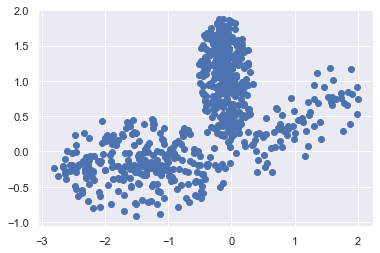

In [4]:
X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
plt.scatter(X,Y)

In [5]:
os.chdir("clustering-benchmark-master/src/main/resources/datasets/artificial")
os.getcwd()
Files = os.listdir()
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        #data_brutes = arff.loadarff(open(f,'r'))[0]    
        #X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        #plt.scatter(X,Y)
        #plt.show()

disk-4000n.arff
disk-5000n.arff
zelnik4.arff
chainlink.arff
st900.arff
square3.arff
sizes5.arff
2d-10c.arff
s-set1.arff
spiral.arff
2d-4c-no9.arff
dpb.arff
tetra.arff
dpc.arff
ds4c2sc8.arff
spiralsquare.arff
rings.arff
pathbased.arff
shapes.arff
cure-t1-2000n-2D.arff
sizes4.arff
square2.arff
dartboard1.arff
2d-4c-no4.arff
zelnik5.arff
atom.arff
smile2.arff
cluto-t5-8k.arff
zelnik2.arff
long2.arff
square5.arff
triangle1.arff
sizes3.arff
donut1.arff
R15.arff
birch-rg1.arff
2d-4c.arff
cuboids.arff
longsquare.arff
curves2.arff
spherical_4_3.arff
disk-3000n.arff
twenty.arff
sizes2.arff
square4.arff
golfball.arff
spherical_6_2.arff
long3.arff
zelnik3.arff
jain.arff
flame.arff
simplex.arff
smile3.arff
cluto-t4-8k.arff
compound.arff
dense-disk-5000.arff
insect.arff
cure-t2-4k.arff
aggregation.arff
complex8.arff
curves1.arff
impossible.arff
cluto-t8-8k.arff
birch-rg3.arff
donut3.arff
banana.arff
twodiamonds.arff
sizes1.arff
target.arff
wingnut.arff
zelnik1.arff
long1.arff
xclara.arff
diamond9.a

## 2) KMeans

In [6]:
KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)

KMeans(n_clusters=3, random_state=0)

In [7]:
for k in range(2,11):
    tps1 = time.time()
    i = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data).n_iter_    
    tps2 = time.time()
    print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

k = 2 , n_iter = 3 , runtime =  21.46 ms
k = 3 , n_iter = 5 , runtime =  27.0 ms
k = 4 , n_iter = 12 , runtime =  29.87 ms
k = 5 , n_iter = 6 , runtime =  36.95 ms
k = 6 , n_iter = 11 , runtime =  38.35 ms
k = 7 , n_iter = 13 , runtime =  39.34 ms
k = 8 , n_iter = 8 , runtime =  49.34 ms
k = 9 , n_iter = 17 , runtime =  52.69 ms
k = 10 , n_iter = 29 , runtime =  55.12 ms


In [8]:
#banana.arff, 2sp2glob.arff, 3-spiral.arff car non convexes

disk-4000n.arff


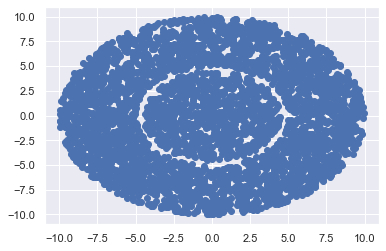

k = 2 , n_iter = 3 , runtime =  27.87 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.5 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.76 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.19 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.88 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.16 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.07 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.02 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.46 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-5000n.arff


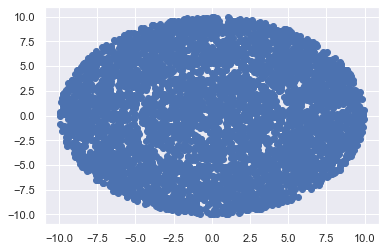

k = 2 , n_iter = 3 , runtime =  24.53 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.85 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.57 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.88 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.47 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.66 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.81 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.53 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.13 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik4.arff


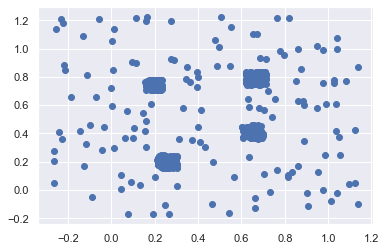

k = 2 , n_iter = 3 , runtime =  25.83 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.32 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.37 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.29 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.54 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.86 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.08 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.17 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  66.92 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

chainlink.arff


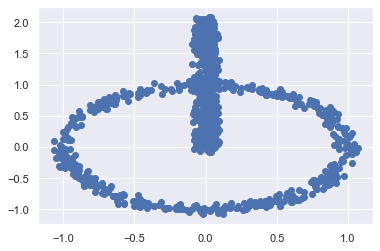

k = 2 , n_iter = 4 , runtime =  24.04 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.76 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.07 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.3 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.11 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.72 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.39 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  62.68 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.57 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

st900.arff


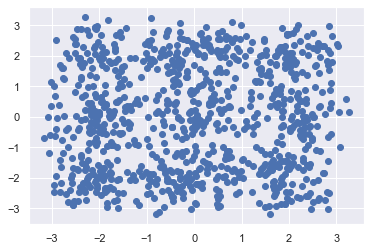

k = 2 , n_iter = 3 , runtime =  26.9 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.74 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.38 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.23 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  51.7 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.52 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.81 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.09 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.82 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

square3.arff


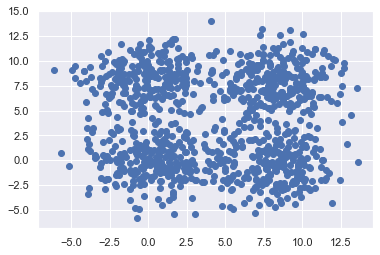

k = 2 , n_iter = 3 , runtime =  24.93 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.48 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.24 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.55 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.85 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.45 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  56.96 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.1 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.21 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

sizes5.arff


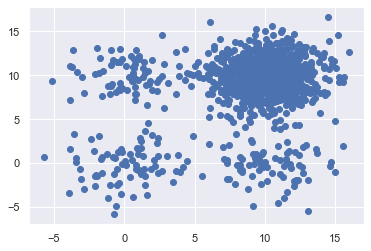

k = 2 , n_iter = 3 , runtime =  24.44 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.39 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.07 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.68 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.35 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.62 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.2 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.83 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-10c.arff


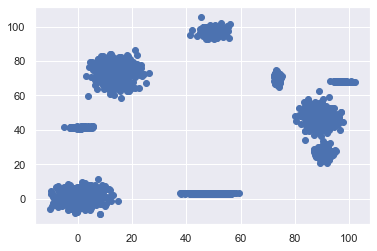

k = 2 , n_iter = 4 , runtime =  27.83 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.04 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.12 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.55 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.6 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.59 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.22 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.54 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.19 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

s-set1.arff


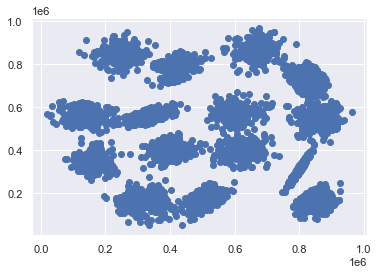

k = 2 , n_iter = 3 , runtime =  23.44 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.12 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.51 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.53 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.87 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.04 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.05 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.03 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.82 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

spiral.arff


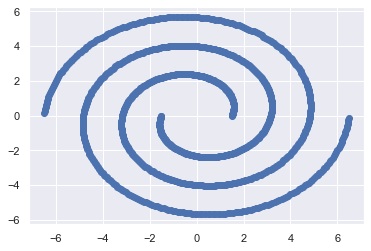

k = 2 , n_iter = 4 , runtime =  25.81 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.56 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.69 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.1 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.37 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.3 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.02 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.88 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.82 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-4c-no9.arff


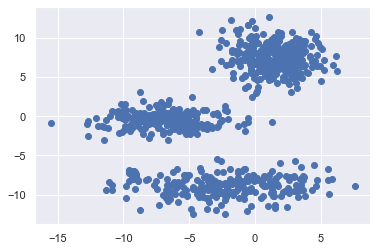

k = 2 , n_iter = 3 , runtime =  23.14 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.06 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.63 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.6 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.72 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.52 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.04 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.17 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.9 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dpb.arff


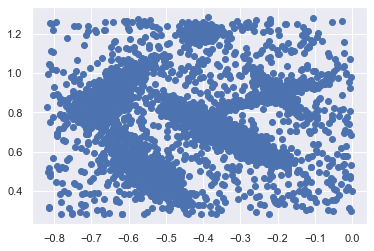

k = 2 , n_iter = 4 , runtime =  24.62 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.74 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.64 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.24 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.34 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.84 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.91 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.27 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.87 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

tetra.arff


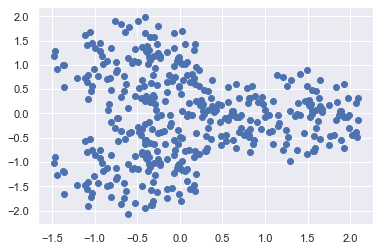

k = 2 , n_iter = 3 , runtime =  24.23 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.89 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.59 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.22 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.58 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.33 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.89 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.94 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.81 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dpc.arff


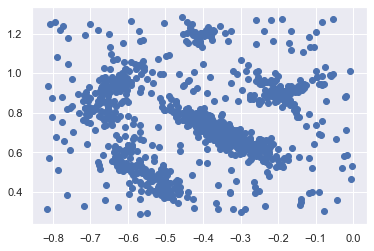

k = 2 , n_iter = 4 , runtime =  23.63 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.78 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.77 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.7 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.85 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.31 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.26 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.35 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.09 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

ds4c2sc8.arff


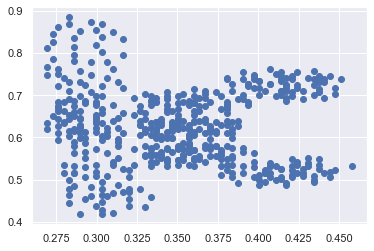

k = 2 , n_iter = 4 , runtime =  23.11 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  32.68 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.02 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.23 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.03 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.37 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  56.98 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.54 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.17 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

spiralsquare.arff


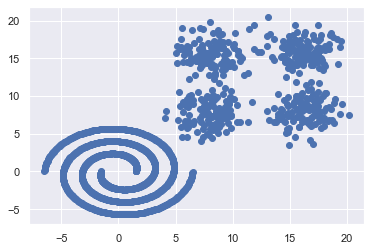

k = 2 , n_iter = 3 , runtime =  23.67 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.09 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.38 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.67 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.49 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.62 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.98 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.18 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.47 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

rings.arff


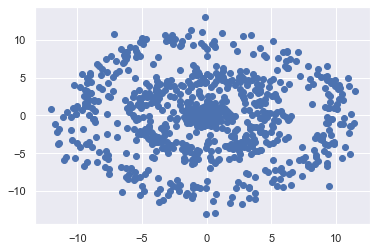

k = 2 , n_iter = 3 , runtime =  24.16 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.54 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.3 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.42 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.17 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.81 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.87 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  62.45 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  66.79 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

pathbased.arff


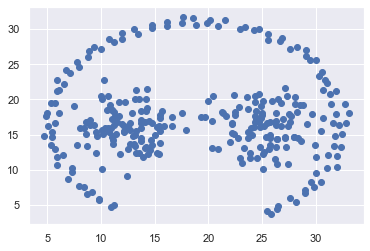

k = 2 , n_iter = 3 , runtime =  23.72 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.34 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  39.61 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.02 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.0 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.24 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.78 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.18 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.39 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

shapes.arff


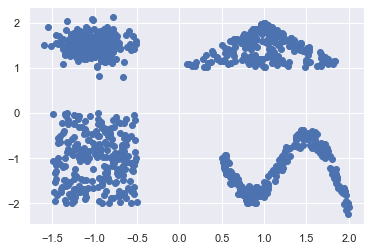

k = 2 , n_iter = 3 , runtime =  26.42 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.42 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.91 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.09 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.73 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  53.73 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.86 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.96 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.98 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cure-t1-2000n-2D.arff


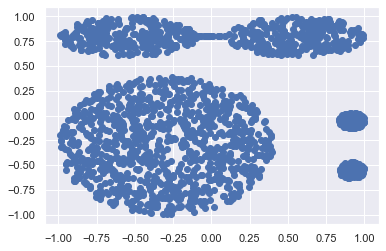

k = 2 , n_iter = 3 , runtime =  25.0 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.04 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.17 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.19 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  51.59 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.07 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.43 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  62.62 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  66.98 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

sizes4.arff


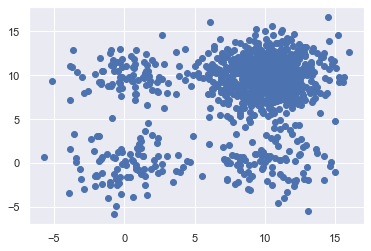

k = 2 , n_iter = 3 , runtime =  24.01 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.81 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.54 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.04 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  51.93 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.77 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.07 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.08 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.51 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

square2.arff


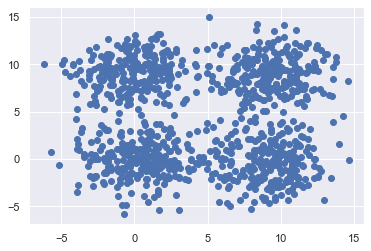

k = 2 , n_iter = 3 , runtime =  23.47 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.52 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.15 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.88 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.56 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.92 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.29 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.41 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.97 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dartboard1.arff


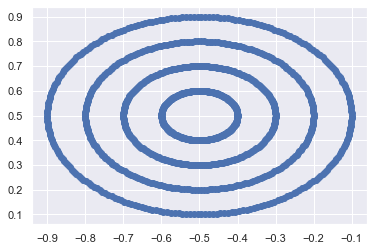

k = 2 , n_iter = 3 , runtime =  25.69 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.78 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.5 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.29 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.02 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.72 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.86 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.2 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.28 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-4c-no4.arff


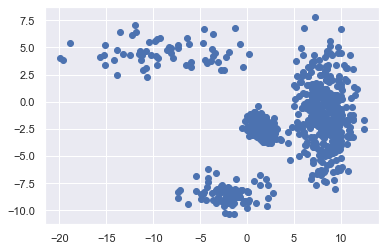

k = 2 , n_iter = 3 , runtime =  23.65 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.13 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.29 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.2 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.73 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.81 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.46 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.49 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.11 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik5.arff


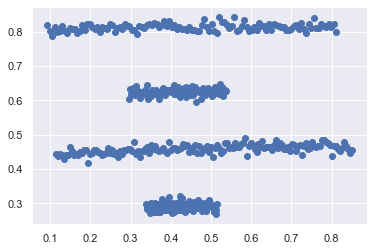

k = 2 , n_iter = 4 , runtime =  25.61 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.49 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  39.13 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.85 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.22 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.61 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.3 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.13 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.69 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

atom.arff


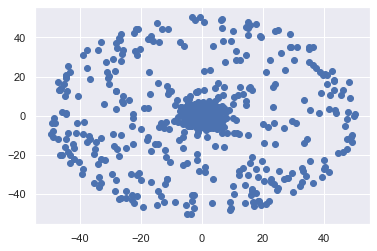

k = 2 , n_iter = 3 , runtime =  23.89 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.91 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  39.99 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.88 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.6 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.29 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.66 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.9 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.17 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

smile2.arff


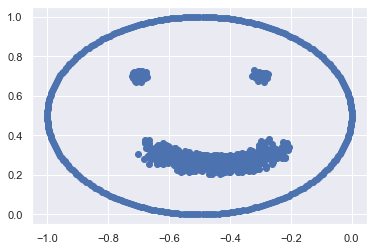

k = 2 , n_iter = 4 , runtime =  25.01 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.07 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.1 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.95 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.54 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.34 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.83 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.42 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.65 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cluto-t5-8k.arff


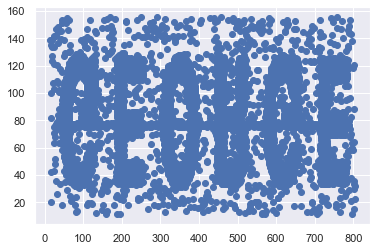

k = 2 , n_iter = 3 , runtime =  24.2 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.05 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.59 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.86 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.2 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.68 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.83 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.86 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.05 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik2.arff


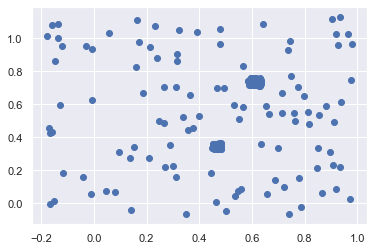

k = 2 , n_iter = 3 , runtime =  24.87 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.83 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.48 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.29 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.77 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.61 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.68 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.7 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.94 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

long2.arff


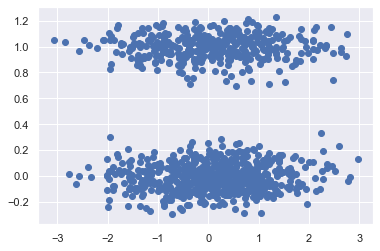

k = 2 , n_iter = 3 , runtime =  24.78 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.02 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.61 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  50.98 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  52.39 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.8 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.39 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.74 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.65 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

square5.arff


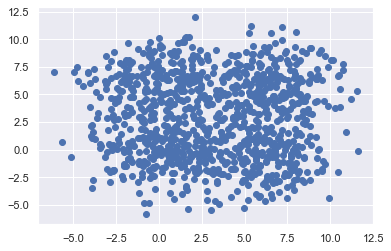

k = 2 , n_iter = 4 , runtime =  25.66 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.11 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.38 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.13 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.31 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.79 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.89 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.98 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.05 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

triangle1.arff


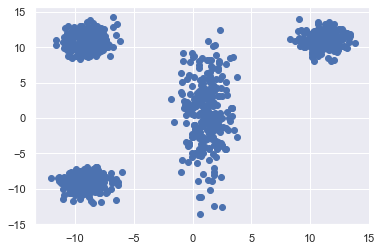

k = 2 , n_iter = 4 , runtime =  24.02 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.83 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.44 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.31 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.1 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  55.45 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.25 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.14 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  67.15 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

sizes3.arff


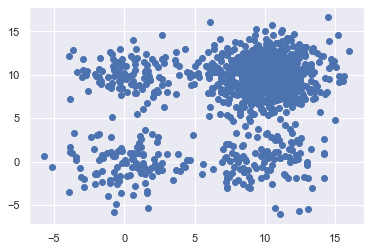

k = 2 , n_iter = 3 , runtime =  23.94 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.19 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.0 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.05 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.69 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.94 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.89 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  63.71 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.27 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

donut1.arff


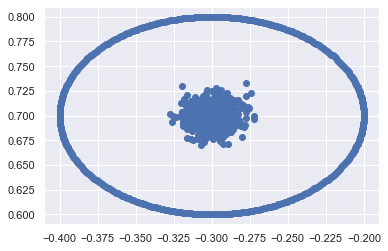

k = 2 , n_iter = 3 , runtime =  24.57 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.2 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.71 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.45 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.1 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.73 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.95 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.82 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.57 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

R15.arff


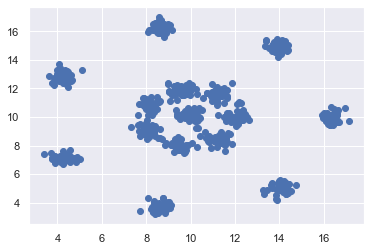

k = 2 , n_iter = 4 , runtime =  24.04 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.25 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.7 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  51.62 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.73 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.22 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.68 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.14 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.61 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

birch-rg1.arff


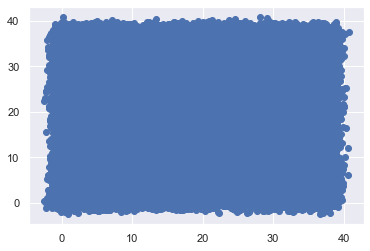

k = 2 , n_iter = 3 , runtime =  28.71 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.74 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.89 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.76 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.21 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.1 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.29 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.0 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.68 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-4c.arff


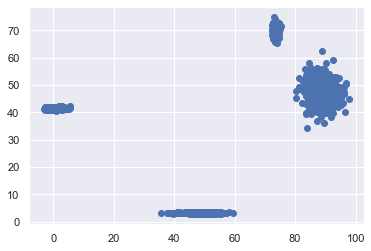

k = 2 , n_iter = 3 , runtime =  28.47 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.08 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.16 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.76 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.26 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.36 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.31 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.48 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.76 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cuboids.arff


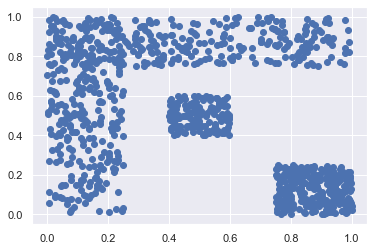

k = 2 , n_iter = 3 , runtime =  28.32 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.89 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.99 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.86 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.94 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.8 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.01 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.55 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  77.2 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

longsquare.arff


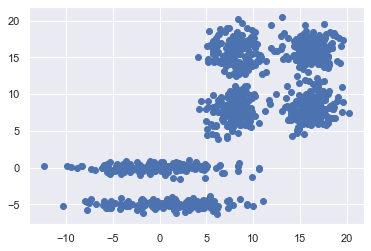

k = 2 , n_iter = 3 , runtime =  29.13 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.25 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.41 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.48 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.62 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.35 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.3 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.57 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.49 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

curves2.arff


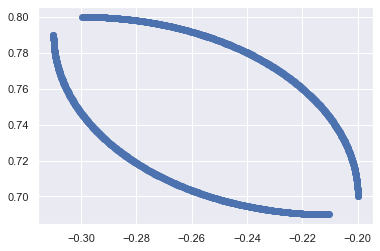

k = 2 , n_iter = 3 , runtime =  27.42 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.54 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.65 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.14 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.37 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.14 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  57.14 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.67 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.68 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

spherical_4_3.arff


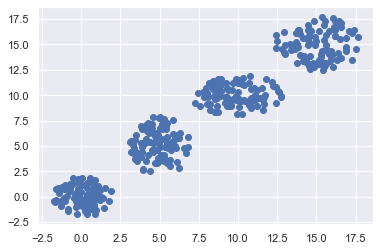

k = 2 , n_iter = 3 , runtime =  26.28 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.21 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.55 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.62 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.1 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  54.54 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.5 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.04 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.22 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-3000n.arff


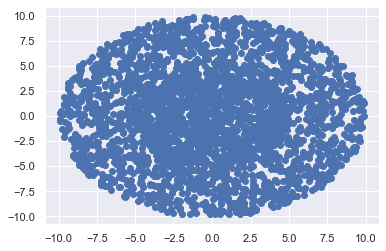

k = 2 , n_iter = 3 , runtime =  26.14 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.35 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.43 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.19 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.75 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.07 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.46 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.23 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.16 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

twenty.arff


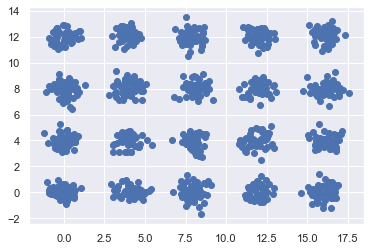

k = 2 , n_iter = 3 , runtime =  29.86 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.22 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.84 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.68 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.09 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.03 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.66 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.72 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.02 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

sizes2.arff


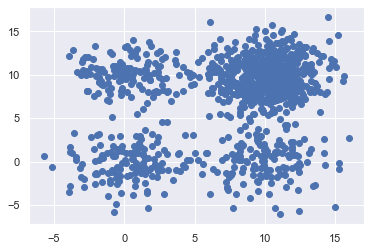

k = 2 , n_iter = 3 , runtime =  25.33 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.96 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.15 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.55 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.35 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.39 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.17 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.08 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.86 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

square4.arff


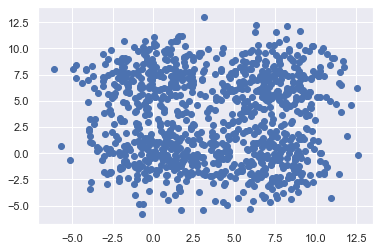

k = 2 , n_iter = 3 , runtime =  27.65 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.2 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.6 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.78 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.7 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  65.15 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.45 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.87 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.51 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

golfball.arff


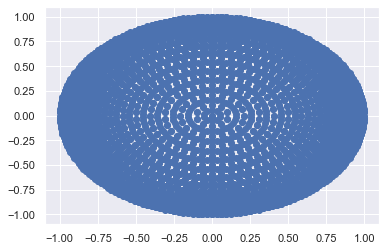

k = 2 , n_iter = 3 , runtime =  24.58 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.11 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.07 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.99 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.54 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.89 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.07 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.82 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.68 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

spherical_6_2.arff


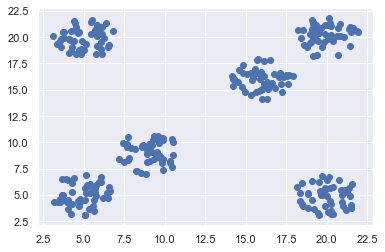

k = 2 , n_iter = 4 , runtime =  25.54 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.34 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.68 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.13 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.28 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.34 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.65 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.66 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.61 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

long3.arff


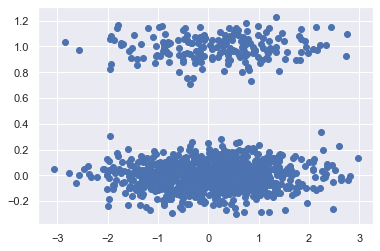

k = 2 , n_iter = 4 , runtime =  24.0 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.82 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.44 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.22 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.55 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.37 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.5 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.65 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.35 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik3.arff


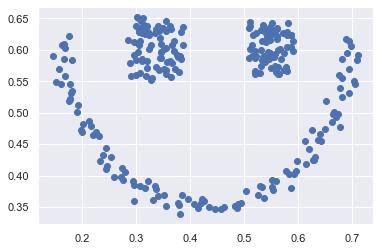

k = 2 , n_iter = 4 , runtime =  28.21 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.79 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.44 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.94 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.02 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.3 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.74 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  71.06 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.71 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

jain.arff


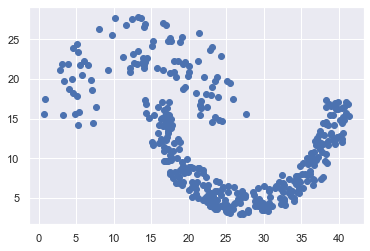

k = 2 , n_iter = 3 , runtime =  25.75 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.2 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.52 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.41 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.99 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.07 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.61 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.53 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.16 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

flame.arff


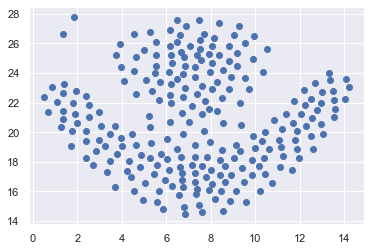

k = 2 , n_iter = 4 , runtime =  31.37 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  38.54 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  46.38 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  57.33 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  61.1 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  61.07 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  65.56 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.74 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.28 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

simplex.arff


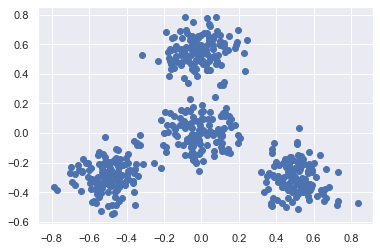

k = 2 , n_iter = 3 , runtime =  28.71 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.74 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.05 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.21 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.71 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.79 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.68 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.98 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  77.04 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

smile3.arff


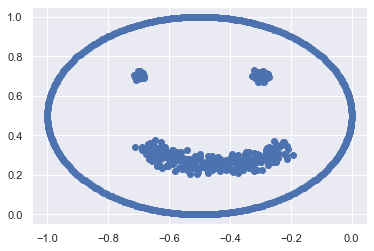

k = 2 , n_iter = 4 , runtime =  29.05 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.39 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.45 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.87 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.09 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  62.53 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  63.18 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.43 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.19 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cluto-t4-8k.arff


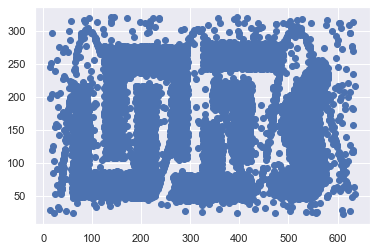

k = 2 , n_iter = 3 , runtime =  25.68 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.93 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  46.93 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  57.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.85 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.26 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  64.32 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  74.54 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.18 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

compound.arff


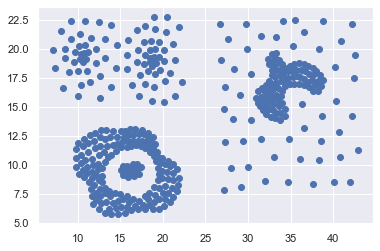

k = 2 , n_iter = 4 , runtime =  25.38 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.84 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  45.87 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.79 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.66 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.37 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  64.23 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  71.2 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  77.5 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dense-disk-5000.arff


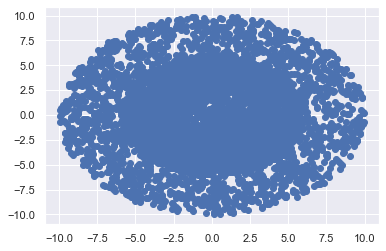

k = 2 , n_iter = 3 , runtime =  26.74 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  38.5 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.96 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.84 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.74 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.4 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.09 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  70.74 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.43 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

insect.arff


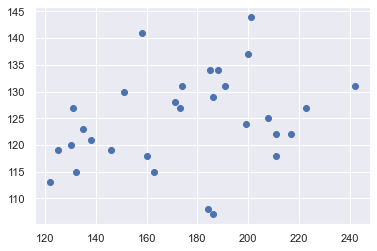

k = 2 , n_iter = 3 , runtime =  24.54 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.41 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  45.18 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.38 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.75 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.94 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.57 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  69.44 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.33 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cure-t2-4k.arff


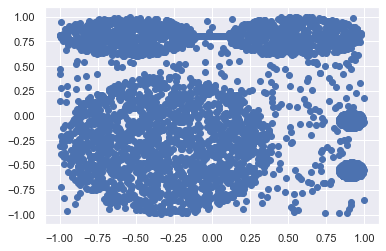

k = 2 , n_iter = 3 , runtime =  27.08 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.54 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.29 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.06 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.18 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.11 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.44 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.8 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.04 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

aggregation.arff


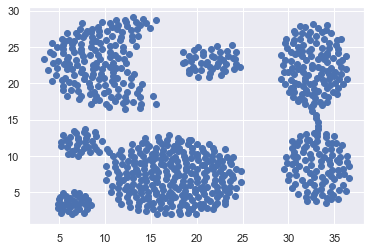

k = 2 , n_iter = 3 , runtime =  25.23 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.43 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.77 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.97 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.12 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.15 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  63.07 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.96 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  75.13 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

complex8.arff


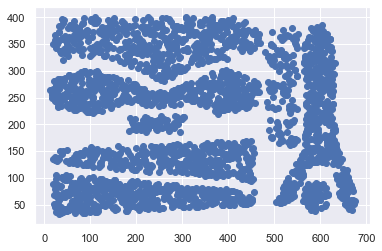

k = 2 , n_iter = 3 , runtime =  27.64 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.7 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  45.33 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.18 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.38 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.43 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.92 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.92 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.68 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

curves1.arff


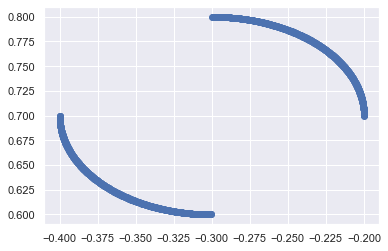

k = 2 , n_iter = 3 , runtime =  26.43 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.59 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.48 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.49 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.36 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.39 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.85 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.77 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.1 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

impossible.arff


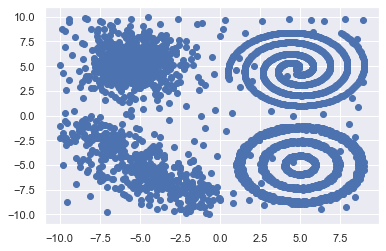

k = 2 , n_iter = 3 , runtime =  25.53 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.58 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.52 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.9 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.56 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.9 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.36 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.83 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.7 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cluto-t8-8k.arff


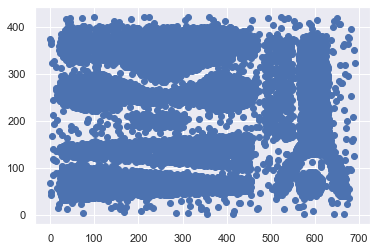

k = 2 , n_iter = 3 , runtime =  28.93 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.89 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.87 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.31 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.42 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.26 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.45 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.14 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.0 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

birch-rg3.arff


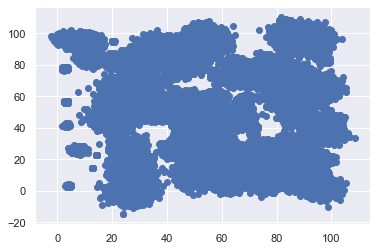

k = 2 , n_iter = 3 , runtime =  25.72 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.23 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.97 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.44 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.6 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.68 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.91 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.52 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.54 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

donut3.arff


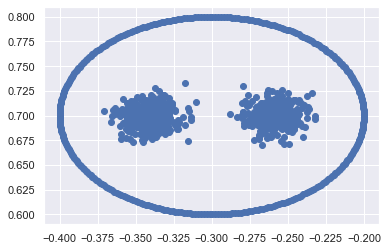

k = 2 , n_iter = 3 , runtime =  25.6 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.93 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.75 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.87 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.47 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.31 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.16 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.85 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.36 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

banana.arff


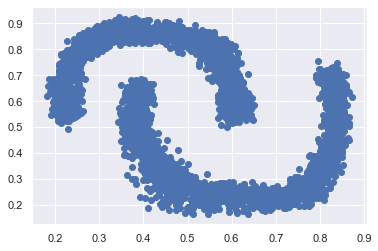

k = 2 , n_iter = 4 , runtime =  26.99 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  38.35 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  47.1 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  58.74 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  60.87 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.42 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  63.25 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  70.71 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  78.07 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

twodiamonds.arff


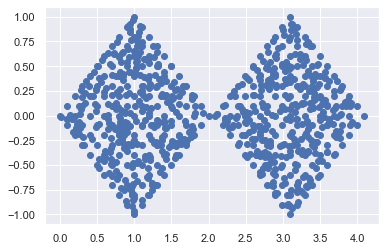

k = 2 , n_iter = 3 , runtime =  28.06 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  39.24 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.58 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  57.93 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  62.18 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.72 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  64.18 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  73.43 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.19 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

sizes1.arff


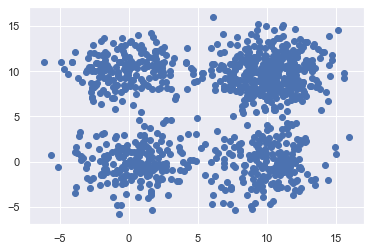

k = 2 , n_iter = 3 , runtime =  27.49 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.85 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.54 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  57.8 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.61 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.8 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.79 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  71.05 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  75.96 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

target.arff


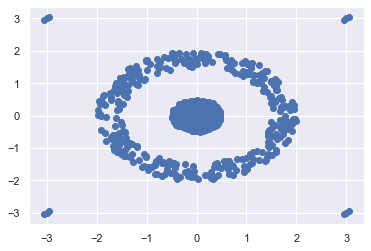

k = 2 , n_iter = 3 , runtime =  25.29 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.29 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.23 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.8 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.66 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.76 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.78 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.41 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.62 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

wingnut.arff


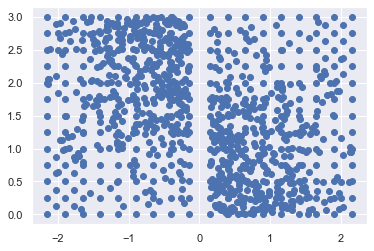

k = 2 , n_iter = 3 , runtime =  24.71 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.99 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.95 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.22 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.65 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  64.52 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.39 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.87 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.54 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik1.arff


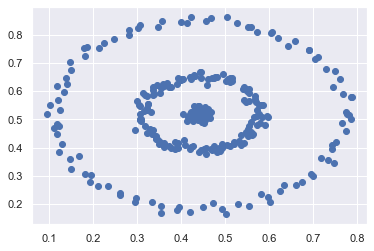

k = 2 , n_iter = 3 , runtime =  29.12 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.11 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.21 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.79 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.17 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.69 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.09 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.92 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.08 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

long1.arff


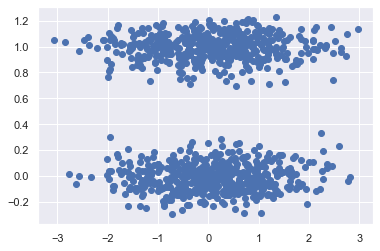

k = 2 , n_iter = 4 , runtime =  24.59 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.07 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.02 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.77 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.03 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.01 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  65.95 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  74.69 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  81.69 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

xclara.arff


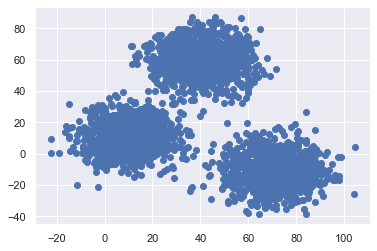

k = 2 , n_iter = 3 , runtime =  26.83 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.37 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.44 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.63 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.82 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.44 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.55 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.32 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.73 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

diamond9.arff


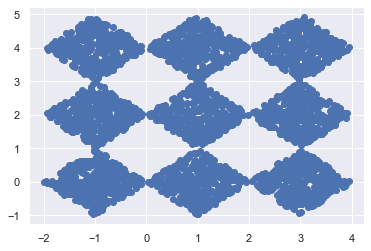

k = 2 , n_iter = 4 , runtime =  27.37 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.69 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  45.64 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.22 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.72 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.24 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.72 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.81 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

elliptical_10_2.arff


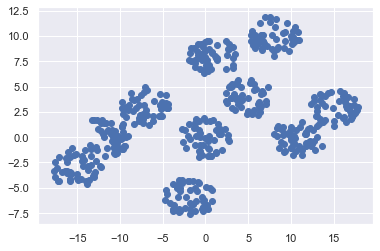

k = 2 , n_iter = 3 , runtime =  30.2 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.14 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.84 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.02 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.94 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.34 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.09 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  69.93 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.38 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

triangle2.arff


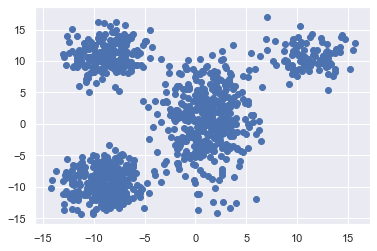

k = 2 , n_iter = 4 , runtime =  25.54 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.04 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.73 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.23 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.49 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.92 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.13 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.78 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.32 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

ds3c3sc6.arff


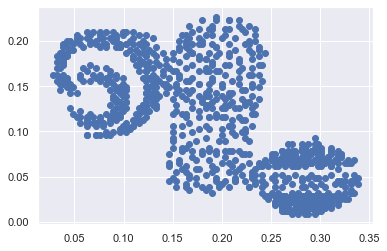

k = 2 , n_iter = 4 , runtime =  25.99 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.74 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.88 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.49 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.39 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.16 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.86 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.04 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.27 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

donut2.arff


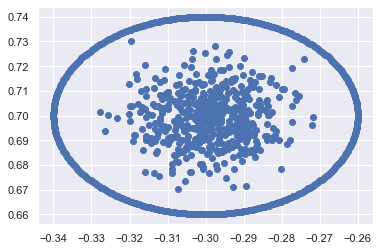

k = 2 , n_iter = 4 , runtime =  25.77 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.27 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.81 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.4 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.54 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.5 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.23 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.15 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  72.33 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

s-set4.arff


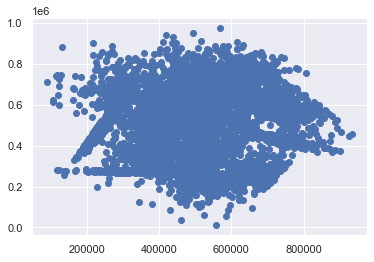

k = 2 , n_iter = 3 , runtime =  26.62 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.28 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.6 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.88 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.13 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.89 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.21 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.71 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.48 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

birch-rg2.arff


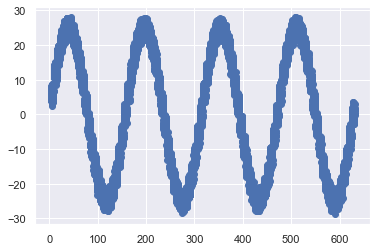

k = 2 , n_iter = 3 , runtime =  25.1 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.52 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.91 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  56.25 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.07 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.82 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.72 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.32 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.33 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

ds2c2sc13.arff


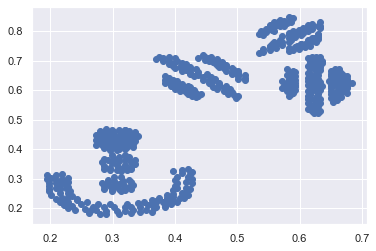

k = 2 , n_iter = 3 , runtime =  25.98 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.09 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.39 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.97 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.3 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.32 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.35 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.44 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.84 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

pmf.arff


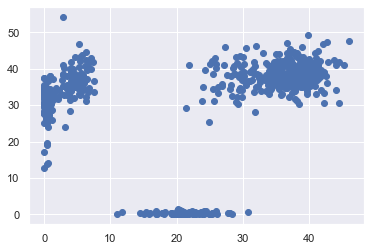

k = 2 , n_iter = 3 , runtime =  24.94 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.89 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.95 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.33 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.53 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.06 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.24 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.58 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.24 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-4600n.arff


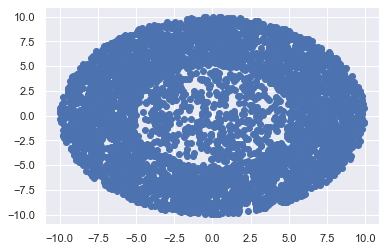

k = 2 , n_iter = 3 , runtime =  29.11 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  38.24 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.36 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.87 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.16 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.7 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.76 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.78 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.86 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-6000n.arff


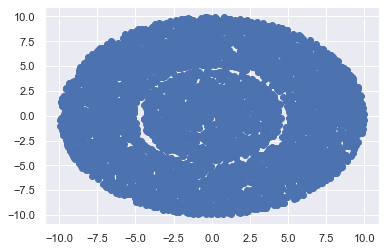

k = 2 , n_iter = 3 , runtime =  23.29 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.94 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.49 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.28 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.26 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.16 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.12 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.16 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.01 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

elly-2d10c13s.arff


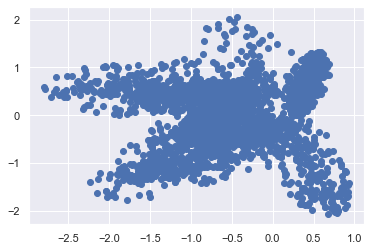

k = 2 , n_iter = 4 , runtime =  29.93 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.56 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.42 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  58.91 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  63.04 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  62.06 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.61 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.73 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.94 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

complex9.arff


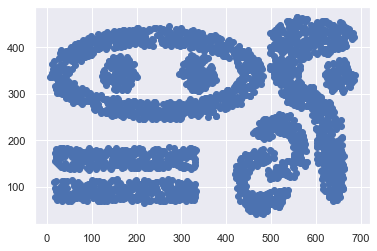

k = 2 , n_iter = 3 , runtime =  29.26 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.14 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.65 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.62 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.96 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.13 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.6 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.69 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  75.69 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

smile1.arff


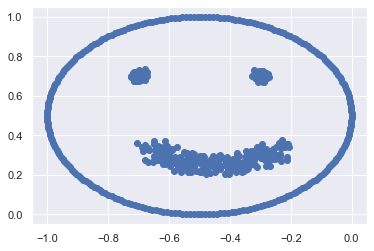

k = 2 , n_iter = 3 , runtime =  25.16 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.83 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.34 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.16 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.4 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.07 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.24 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.78 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.4 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

fourty.arff


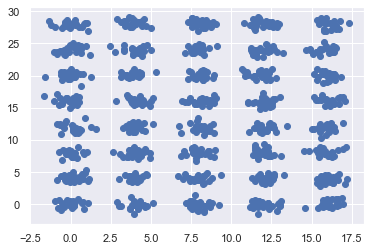

k = 2 , n_iter = 4 , runtime =  26.17 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.96 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.71 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.82 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.23 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.62 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.64 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  69.49 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.13 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cluto-t7-10k.arff


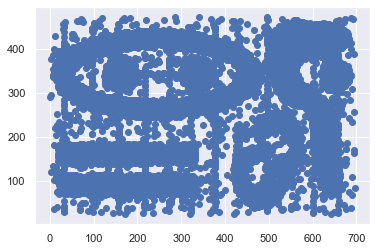

k = 2 , n_iter = 3 , runtime =  25.19 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.45 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.73 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.14 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.35 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.25 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.29 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  69.52 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.86 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

spherical_5_2.arff


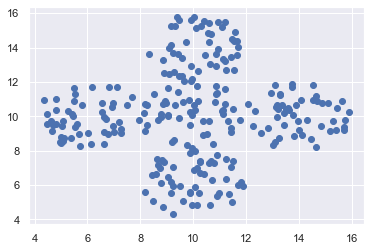

k = 2 , n_iter = 3 , runtime =  26.52 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.98 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.91 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.61 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.23 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.39 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.55 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.87 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.18 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

s-set3.arff


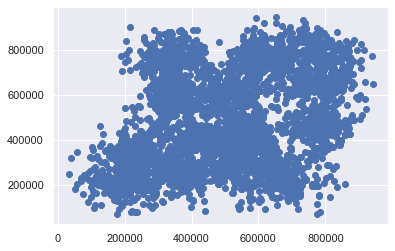

k = 2 , n_iter = 3 , runtime =  26.23 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.86 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.22 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.71 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.77 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.24 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  62.21 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.66 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.19 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dartboard2.arff


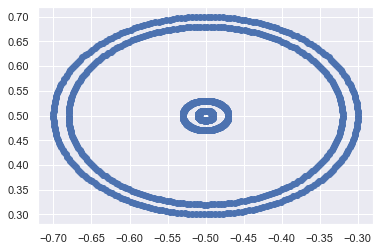

k = 2 , n_iter = 3 , runtime =  25.88 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.01 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.52 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.08 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.16 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.5 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.68 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.33 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.04 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

square1.arff


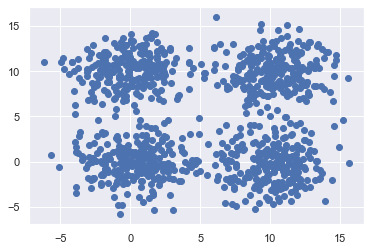

k = 2 , n_iter = 3 , runtime =  24.44 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.03 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.41 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.43 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.54 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.77 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  63.71 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.13 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.67 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-3c-no123.arff


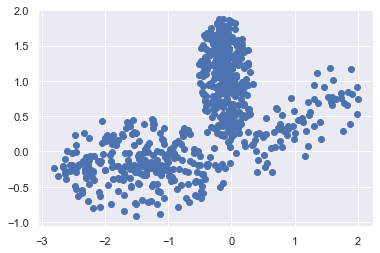

k = 2 , n_iter = 3 , runtime =  25.53 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.72 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.81 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.93 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.08 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.51 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.42 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.9 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.14 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

threenorm.arff


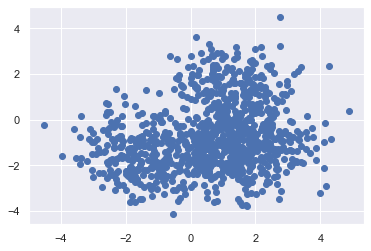

k = 2 , n_iter = 3 , runtime =  26.66 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.76 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.61 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.89 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.04 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.86 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.9 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  71.15 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

hypercube.arff


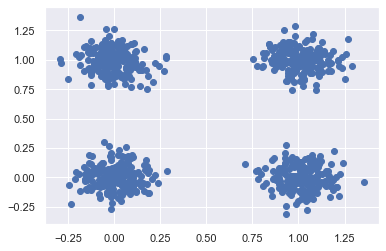

k = 2 , n_iter = 4 , runtime =  24.88 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.58 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.86 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.23 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.93 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.06 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.53 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.74 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.68 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

zelnik6.arff


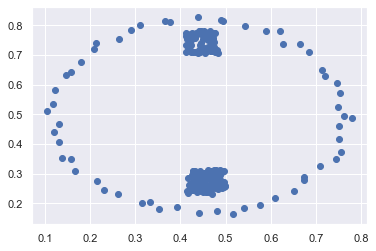

k = 2 , n_iter = 3 , runtime =  25.22 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.01 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.25 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.7 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.87 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.43 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.95 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  64.67 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.27 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

circle.arff


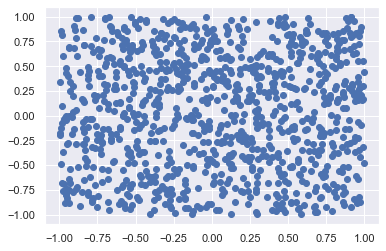

k = 2 , n_iter = 4 , runtime =  25.62 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.52 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.82 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.99 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.63 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.84 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.49 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.48 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.87 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

gaussians1.arff


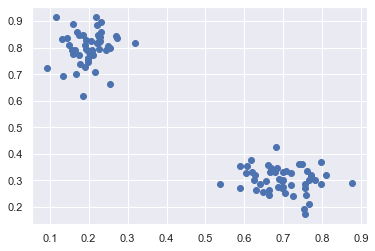

k = 2 , n_iter = 4 , runtime =  24.78 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.75 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.3 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.69 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.25 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.56 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.01 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  69.59 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.4 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-1000n.arff


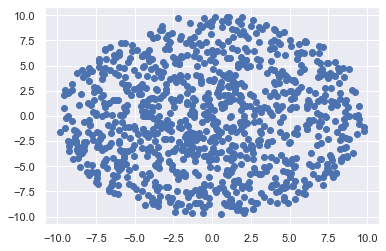

k = 2 , n_iter = 3 , runtime =  28.64 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.45 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.77 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.0 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.26 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.83 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.91 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.73 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.82 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

engytime.arff


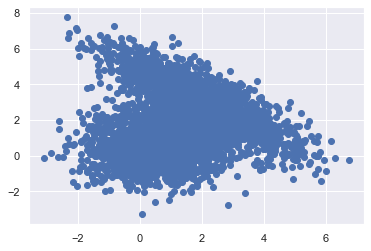

k = 2 , n_iter = 3 , runtime =  25.08 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.93 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.58 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.59 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.57 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.32 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.93 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.21 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

dense-disk-3000.arff


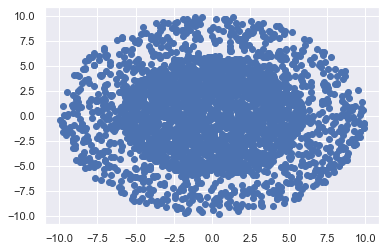

k = 2 , n_iter = 4 , runtime =  25.47 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.97 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.02 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.51 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.72 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.42 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.92 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.02 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.28 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cure-t0-2000n-2D.arff


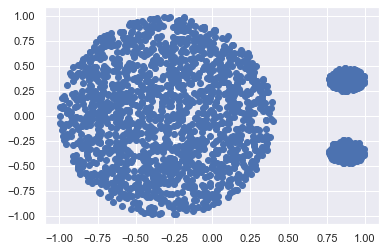

k = 2 , n_iter = 4 , runtime =  25.97 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.04 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.83 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.8 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.98 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.81 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.78 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.46 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.31 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

blobs.arff


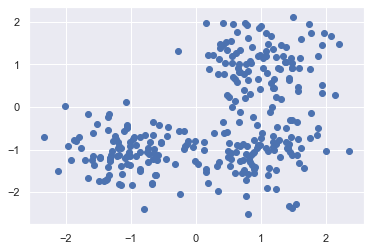

k = 2 , n_iter = 3 , runtime =  26.2 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.51 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.16 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.43 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.32 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.33 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.01 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.25 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.95 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

mopsi-finland.arff


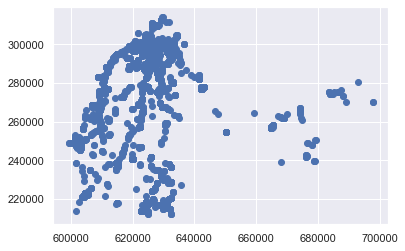

k = 2 , n_iter = 3 , runtime =  25.02 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.68 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.46 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.24 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  55.03 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.04 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.89 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.66 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.29 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

hepta.arff


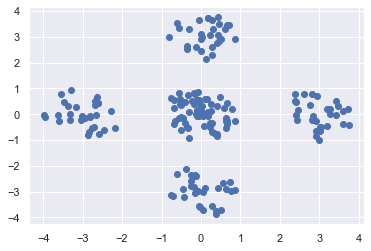

k = 2 , n_iter = 3 , runtime =  27.11 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.5 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.8 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.83 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.91 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.34 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.43 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.93 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.77 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

D31.arff


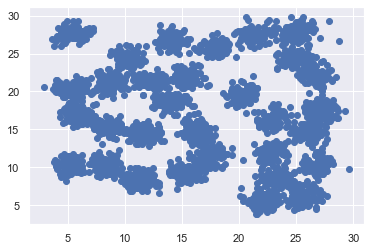

k = 2 , n_iter = 3 , runtime =  24.98 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.69 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.03 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.58 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.39 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.3 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.62 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.9 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  73.45 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

donutcurves.arff


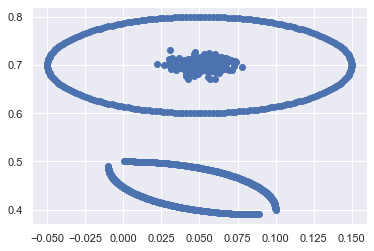

k = 2 , n_iter = 3 , runtime =  26.48 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.85 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  40.68 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.01 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.21 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.34 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.25 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.31 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  68.95 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

xor.arff


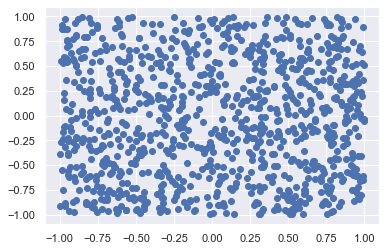

k = 2 , n_iter = 3 , runtime =  24.79 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  36.42 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.56 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.94 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.87 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.61 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  64.02 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  70.23 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.65 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

aml28.arff


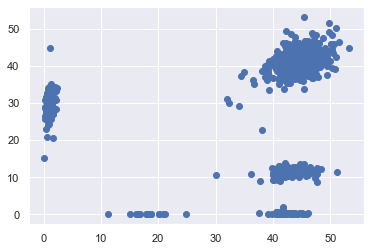

k = 2 , n_iter = 4 , runtime =  28.6 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.63 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.98 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.77 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.05 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.43 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.15 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.14 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.15 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2dnormals.arff


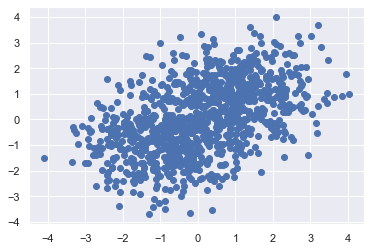

k = 2 , n_iter = 3 , runtime =  27.82 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.04 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.71 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.3 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.44 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.99 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.85 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.58 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.95 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

cassini.arff


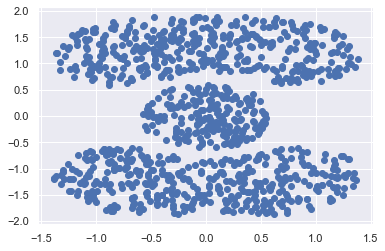

k = 2 , n_iter = 3 , runtime =  25.75 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.87 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.36 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.1 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  56.19 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.3 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.26 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.98 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  76.47 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2d-20c-no0.arff


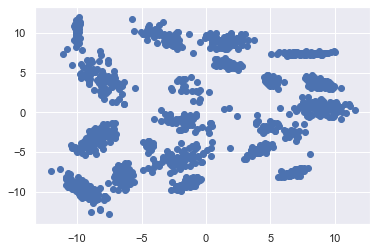

k = 2 , n_iter = 3 , runtime =  25.44 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.76 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  45.52 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  59.21 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.13 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.29 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  63.57 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  68.41 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.63 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

mopsi-joensuu.arff


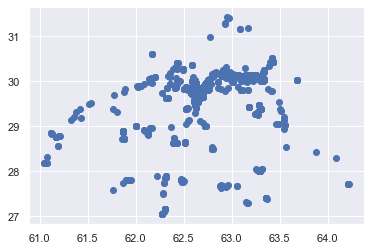

k = 2 , n_iter = 3 , runtime =  26.21 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  37.68 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  44.36 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  55.68 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  59.12 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  58.19 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  65.28 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  67.9 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  74.83 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

2sp2glob.arff


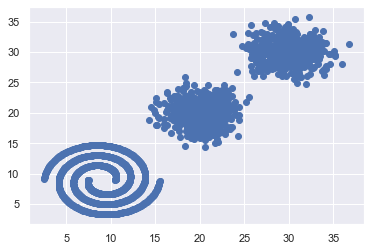

k = 2 , n_iter = 3 , runtime =  24.87 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.99 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.07 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.37 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  57.1 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  59.04 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.86 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  76.86 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  81.06 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

s-set2.arff


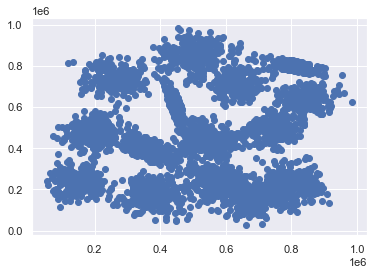

k = 2 , n_iter = 3 , runtime =  29.3 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.3 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  43.42 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  54.01 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  58.55 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  60.01 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  61.33 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.04 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.75 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

disk-4500n.arff


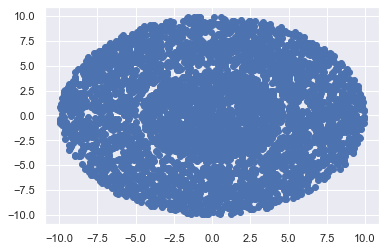

k = 2 , n_iter = 3 , runtime =  23.84 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  35.36 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.35 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.59 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  53.93 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.31 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  59.27 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.75 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  70.29 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

3-spiral.arff


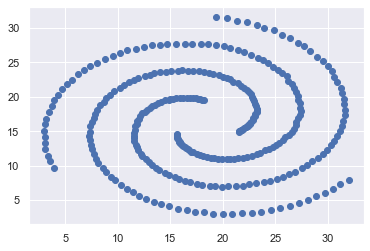

k = 2 , n_iter = 3 , runtime =  23.83 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  33.9 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  41.89 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  52.91 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.31 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  57.21 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  60.58 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  66.75 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.72 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265

lsun.arff


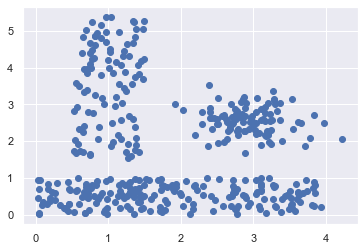

k = 2 , n_iter = 3 , runtime =  25.0 ms  silh_score =  0.5752880726565915  Davies=  0.6356318987064655
k = 3 , n_iter = 5 , runtime =  34.4 ms  silh_score =  0.4894256848510044  Davies=  0.8424514877492043
k = 4 , n_iter = 12 , runtime =  42.85 ms  silh_score =  0.4913373724574225  Davies=  0.6970969637014574
k = 5 , n_iter = 6 , runtime =  53.17 ms  silh_score =  0.4568064855876735  Davies=  0.7205429699314116
k = 6 , n_iter = 11 , runtime =  54.35 ms  silh_score =  0.4384791231836899  Davies=  0.7785891568276851
k = 7 , n_iter = 13 , runtime =  56.89 ms  silh_score =  0.4118281006453409  Davies=  0.8035186621110612
k = 8 , n_iter = 8 , runtime =  58.88 ms  silh_score =  0.41599003569319243  Davies=  0.7728426084408713
k = 9 , n_iter = 17 , runtime =  65.25 ms  silh_score =  0.4139634153795483  Davies=  0.8009925809244103
k = 10 , n_iter = 29 , runtime =  69.26 ms  silh_score =  0.41416615739108475  Davies=  0.7848901566246265



In [13]:
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        plt.scatter(X,Y)
        plt.show()
        for k in range(2,11):
            tps1 = time.time()
            model = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data)
            i = model.n_iter_ 
            silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
            davies_b = metrics.davies_bouldin_score(data, model.labels_)
            tps2 = time.time()
            print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms", " silh_score = ", silh, " Davies= ", davies_b)
        print()

## 3) Agglomerative Clustering

disk-4000n.arff
k = 2 , runtime =  221.68 ms silh_score =  0.23796850423313473 davies =  1.077437320842974


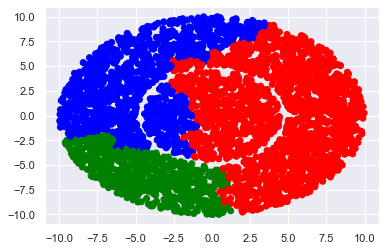

k = 3 , runtime =  185.16 ms silh_score =  0.30439974261816893 davies =  0.9626232659197335
k = 4 , runtime =  208.09 ms silh_score =  0.31290212149824764 davies =  0.9276866749912753
k = 5 , runtime =  188.76 ms silh_score =  0.3131525250268892 davies =  0.9332917180374993
k = 6 , runtime =  185.1 ms silh_score =  0.2742942254751583 davies =  0.9715076975527146
k = 7 , runtime =  188.62 ms silh_score =  0.25199048588609163 davies =  0.9566389874733313
k = 8 , runtime =  181.48 ms silh_score =  0.24631288869977735 davies =  0.9556753733830483
k = 9 , runtime =  184.69 ms silh_score =  0.2605554998721631 davies =  1.0514138657540313
k = 10 , runtime =  184.49 ms silh_score =  0.29398641181902235 davies =  0.9506696472515834

disk-5000n.arff
k = 2 , runtime =  353.89 ms silh_score =  0.20865638968707567 davies =  1.1493154593842971


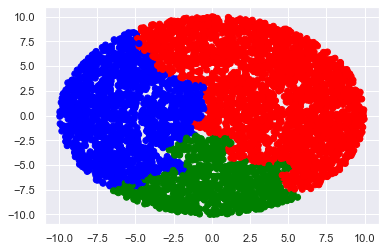

k = 3 , runtime =  374.85 ms silh_score =  0.3104744048848032 davies =  0.9309753277628396
k = 4 , runtime =  338.7 ms silh_score =  0.32775103953129303 davies =  0.8103262637522841
k = 5 , runtime =  368.89 ms silh_score =  0.3120376699500133 davies =  0.9330423208172066
k = 6 , runtime =  326.42 ms silh_score =  0.30451330993084397 davies =  0.958374124415823
k = 7 , runtime =  323.24 ms silh_score =  0.28067494865528225 davies =  0.9874762630367712
k = 8 , runtime =  319.86 ms silh_score =  0.2834478890630433 davies =  0.9376001587610578
k = 9 , runtime =  342.07 ms silh_score =  0.2766793150564489 davies =  0.9472043545473815
k = 10 , runtime =  326.22 ms silh_score =  0.2579663891012831 davies =  1.0109662084686

zelnik4.arff
k = 2 , runtime =  4.27 ms silh_score =  0.43309281141832323 davies =  1.1166750678482533


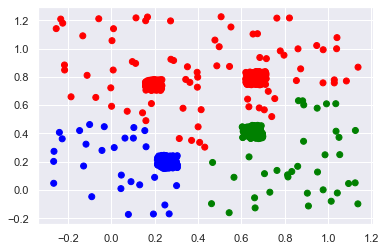

k = 3 , runtime =  4.41 ms silh_score =  0.4933454864417435 davies =  0.7688497912128985
k = 4 , runtime =  5.02 ms silh_score =  0.6328304093263342 davies =  0.5269610151165638
k = 5 , runtime =  5.43 ms silh_score =  0.6198467527598414 davies =  0.672803552650883
k = 6 , runtime =  4.75 ms silh_score =  0.6180871234661514 davies =  0.7561467881430061
k = 7 , runtime =  4.59 ms silh_score =  0.5909924778394348 davies =  0.871066430213011
k = 8 , runtime =  5.27 ms silh_score =  0.6152408637760571 davies =  0.8217887422499558
k = 9 , runtime =  5.48 ms silh_score =  0.640971743493293 davies =  0.7647254413352054
k = 10 , runtime =  5.38 ms silh_score =  0.6386674766783657 davies =  0.7121159687355945

chainlink.arff
k = 2 , runtime =  11.16 ms silh_score =  0.3487481830637352 davies =  1.2527565784918309


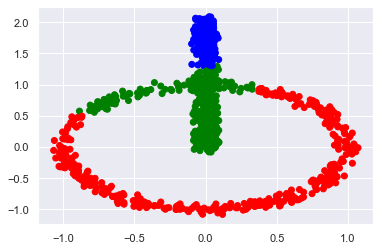

k = 3 , runtime =  12.56 ms silh_score =  0.3602442636437224 davies =  1.220305873792505
k = 4 , runtime =  10.16 ms silh_score =  0.4616146109267385 davies =  0.8578070160643503
k = 5 , runtime =  12.25 ms silh_score =  0.5020257621562764 davies =  0.7120163811752773
k = 6 , runtime =  12.23 ms silh_score =  0.4948832910654836 davies =  0.665248752218743
k = 7 , runtime =  10.02 ms silh_score =  0.49179227138438186 davies =  0.6552255515524356
k = 8 , runtime =  10.61 ms silh_score =  0.4801852481096056 davies =  0.6255349391598802
k = 9 , runtime =  10.26 ms silh_score =  0.4949933905667929 davies =  0.6056605667178806
k = 10 , runtime =  13.97 ms silh_score =  0.5669031852124444 davies =  0.5233967230207374

st900.arff
k = 2 , runtime =  10.67 ms silh_score =  0.3216996692699431 davies =  1.2530190425278498


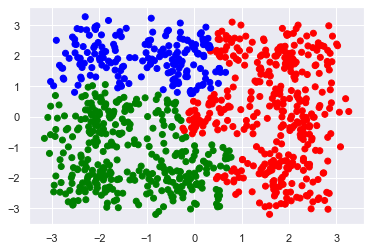

k = 3 , runtime =  10.6 ms silh_score =  0.33498692307868144 davies =  0.9236846701749807
k = 4 , runtime =  12.76 ms silh_score =  0.33906876558571375 davies =  0.7972345520098896
k = 5 , runtime =  8.44 ms silh_score =  0.3326020294072957 davies =  0.8529714457003872
k = 6 , runtime =  8.9 ms silh_score =  0.3447725948352814 davies =  0.8876847390096154
k = 7 , runtime =  8.86 ms silh_score =  0.3532788379259214 davies =  0.8445849202232768
k = 8 , runtime =  8.58 ms silh_score =  0.3643007733121692 davies =  0.7968893806084953
k = 9 , runtime =  9.29 ms silh_score =  0.37210432823244377 davies =  0.7816337974272861
k = 10 , runtime =  8.59 ms silh_score =  0.3568484176121945 davies =  0.8110134571982319

square3.arff
k = 2 , runtime =  10.33 ms silh_score =  0.36754281764216296 davies =  1.1781838121946429


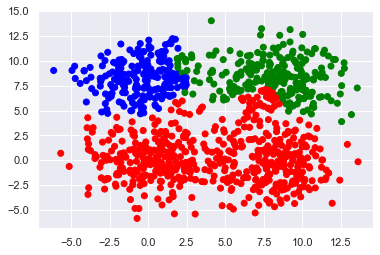

k = 3 , runtime =  10.86 ms silh_score =  0.3707878893033383 davies =  0.8045619229297271
k = 4 , runtime =  10.57 ms silh_score =  0.394325987431263 davies =  0.7882142583796083
k = 5 , runtime =  11.11 ms silh_score =  0.3341165076035165 davies =  1.050406310641001
k = 6 , runtime =  10.73 ms silh_score =  0.2946141669472604 davies =  1.0834765376066946
k = 7 , runtime =  10.26 ms silh_score =  0.2680430082268252 davies =  1.0543984129487527
k = 8 , runtime =  10.86 ms silh_score =  0.2665182055005747 davies =  0.9975961711958359
k = 9 , runtime =  9.9 ms silh_score =  0.30019406612964983 davies =  0.9094267049042055
k = 10 , runtime =  10.65 ms silh_score =  0.2845304483446692 davies =  0.9147503912232846

sizes5.arff
k = 2 , runtime =  10.97 ms silh_score =  0.5806620844223851 davies =  0.8103416254669183


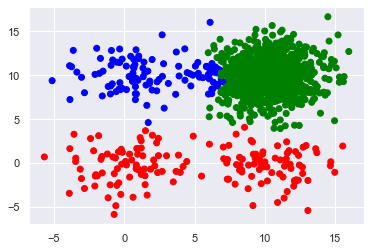

k = 3 , runtime =  12.82 ms silh_score =  0.5209361290939415 davies =  0.7727080457806946
k = 4 , runtime =  12.69 ms silh_score =  0.5204438452400627 davies =  0.6902627909459628
k = 5 , runtime =  11.27 ms silh_score =  0.49775428726022447 davies =  0.8015266000607248
k = 6 , runtime =  12.83 ms silh_score =  0.316179829445293 davies =  0.9341872011802398
k = 7 , runtime =  12.23 ms silh_score =  0.2939660981067527 davies =  0.9365172961132657
k = 8 , runtime =  11.6 ms silh_score =  0.2967766105228839 davies =  1.0489682658917612
k = 9 , runtime =  10.26 ms silh_score =  0.247655839541627 davies =  1.1210930483114343
k = 10 , runtime =  10.63 ms silh_score =  0.2372407682150588 davies =  1.1610020254045514

2d-10c.arff
k = 2 , runtime =  103.34 ms silh_score =  0.4319375426986309 davies =  0.9384966782888348


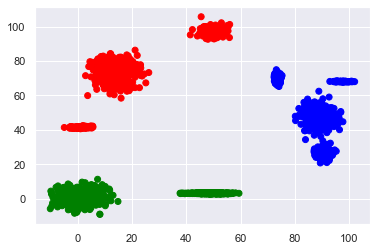

k = 3 , runtime =  99.59 ms silh_score =  0.6181693057982444 davies =  0.5981414896365433
k = 4 , runtime =  99.0 ms silh_score =  0.680192656341491 davies =  0.4891676495608589
k = 5 , runtime =  103.44 ms silh_score =  0.73347455779082 davies =  0.32846421749284066
k = 6 , runtime =  99.29 ms silh_score =  0.6932256370018 davies =  0.4823007603406975
k = 7 , runtime =  104.61 ms silh_score =  0.7375884416799317 davies =  0.4038234123159778
k = 8 , runtime =  102.19 ms silh_score =  0.7569111339092157 davies =  0.4203805650777325
k = 9 , runtime =  100.08 ms silh_score =  0.6856057085634313 davies =  0.6068522861630083
k = 10 , runtime =  100.55 ms silh_score =  0.7088267388933748 davies =  0.5895310771365917

s-set1.arff
k = 2 , runtime =  298.4 ms silh_score =  0.35391641985395556 davies =  1.2202944651348029


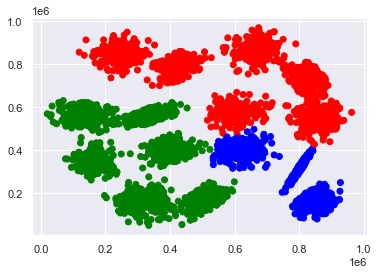

k = 3 , runtime =  364.89 ms silh_score =  0.37226286470652314 davies =  0.9036231790263182
k = 4 , runtime =  324.79 ms silh_score =  0.4100214761653249 davies =  0.7367777993611014
k = 5 , runtime =  325.68 ms silh_score =  0.46581877848606745 davies =  0.7391254807502886
k = 6 , runtime =  330.37 ms silh_score =  0.4674797998631363 davies =  0.7504703002295435
k = 7 , runtime =  307.02 ms silh_score =  0.49759967471811833 davies =  0.7729354446543775
k = 8 , runtime =  334.25 ms silh_score =  0.5000346046017706 davies =  0.76452873767563
k = 9 , runtime =  334.7 ms silh_score =  0.5429123542723601 davies =  0.6676243383105513
k = 10 , runtime =  321.23 ms silh_score =  0.5537210571634993 davies =  0.6251527426527448

spiral.arff
k = 2 , runtime =  8.32 ms silh_score =  0.2812006681855568 davies =  1.0742830998412527


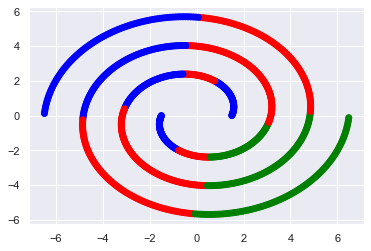

k = 3 , runtime =  9.4 ms silh_score =  0.16710299883413673 davies =  2.1809796893508224
k = 4 , runtime =  10.22 ms silh_score =  0.26567009892257454 davies =  1.0045758568522065
k = 5 , runtime =  10.92 ms silh_score =  0.23024179777277873 davies =  1.0011908318222607
k = 6 , runtime =  9.58 ms silh_score =  0.2092663949705211 davies =  1.0363091653612646
k = 7 , runtime =  9.54 ms silh_score =  0.26965427841018486 davies =  0.9759692327369993
k = 8 , runtime =  9.5 ms silh_score =  0.27599186154130867 davies =  0.9703471312255747
k = 9 , runtime =  9.47 ms silh_score =  0.28232944467243243 davies =  0.945844573774626
k = 10 , runtime =  8.92 ms silh_score =  0.2889682374818293 davies =  0.9409447605685441



In [14]:
colormap=np.array(['Red','green','blue'])
for f in Files[:10] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])

        for k in range(2,11):
            tps1 = time.time()
            model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage="complete").fit(data) #linkage = single, average, complete, ward
            tps2 = time.time()
            silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
            davies_b = metrics.davies_bouldin_score(data, model.labels_)
            if k == 3:
                plt.scatter(X,Y, c=colormap[model.labels_])
                plt.show()
            print("k =",k,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh, "davies = ", davies_b)
        print()

## 4) DBSCAN

2d-10c.arff
min-sample = 2 eps = 2 , runtime = 23.08 ms silh_score = 0.6454433665632957 nb_cluster = 13
min-sample = 2 eps = 3 , runtime = 27.43 ms silh_score = 0.7304956006302366 nb_cluster = 8
min-sample = 2 eps = 4 , runtime = 29.27 ms silh_score = 0.7319781022325214 nb_cluster = 8
min-sample = 2 eps = 5 , runtime = 29.28 ms silh_score = 0.7373288555059309 nb_cluster = 7
min-sample = 2 eps = 6 , runtime = 27.73 ms silh_score = 0.7771329700076133 nb_cluster = 7
min-sample = 2 eps = 7 , runtime = 28.82 ms silh_score = 0.7525629204969061 nb_cluster = 6
min-sample = 2 eps = 8 , runtime = 28.31 ms silh_score = 0.7525629204969061 nb_cluster = 6
min-sample = 2 eps = 9 , runtime = 28.26 ms silh_score = 0.7525629204969061 nb_cluster = 6
min-sample = 3 eps = 2 , runtime = 21.55 ms silh_score = 0.7816955488686198 nb_cluster = 9
min-sample = 3 eps = 3 , runtime = 23.5 ms silh_score = 0.7733470827465355 nb_cluster = 7
min-sample = 3 eps = 4 , runtime = 25.0 ms silh_score = 0.7750270133027677 nb_

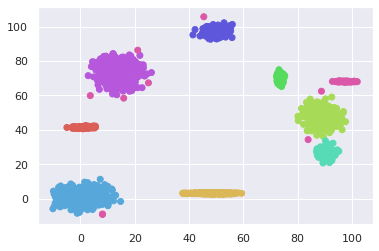

2d-20c-no0.arff
min-sample = 2 eps = 2 , runtime = 8.96 ms silh_score = 0.06983413797418914 nb_cluster = 5


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [34]:
colormap=np.array(['Red','green','blue'])

for f in Files[:4] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        df = pd.DataFrame(columns = ['ms', 'eps', 'runtime', 'silhouette', 'nb_cluster', 'labels']) #dataframe pour stocker toutes les params et résultats étudiés
        for ms in range(2,11):
            for eps_i in range(2,10):
                eps = eps_i
                tps1 = time.time() 
                model = DBSCAN(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
                model.fit(data)
                tps2 = time.time()
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                nb_clust = np.max(model.labels_)
                print("min-sample =",ms,"eps =",eps,", runtime =", round((tps2 - tps1)*1000,2),"ms","silh_score =",silh, "nb_cluster =",nb_clust)
                df.loc[i] = [ms, eps, round((tps2 - tps1)*1000,2), silh, nb_clust,model.labels_]
                i+=1

        paramax=df.iloc[df["silhouette"].idxmax()]
        print("runtime    = ", paramax["runtime"],"ms","\nsilh_score = ",paramax["silhouette"],"\nnb_cluster = ",paramax["nb_cluster"])
        palette = sns.color_palette("hls", paramax["nb_cluster"]+1)
        cluster_colors = [palette[col] for col in paramax["labels"]]
        plt.scatter(data.T[0], data.T[1], c=cluster_colors)
        plt.show()

## 5) HDBSCAN

2d-10c.arff

runtime    =  48.33 ms 
silh_score =  0.8374016743635769


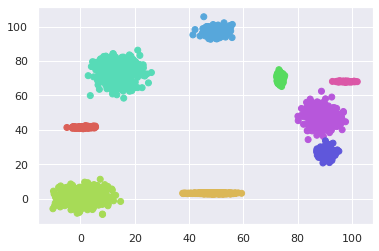

2d-20c-no0.arff

runtime    =  24.97 ms 
silh_score =  0.6275540649486154


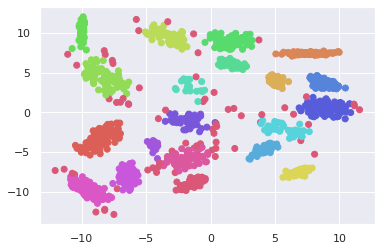

2d-3c-no123.arff

runtime    =  12.95 ms 
silh_score =  0.3641773188608229


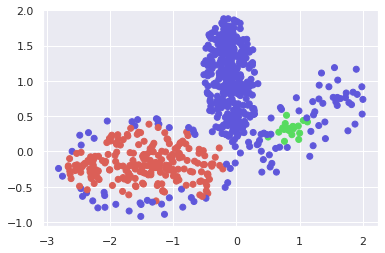

2d-4c-no4.arff

runtime    =  14.98 ms 
silh_score =  0.5945129083932815


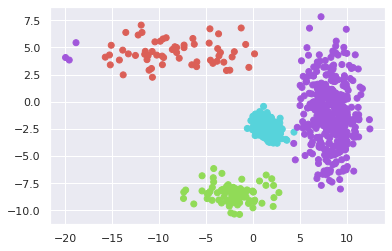

In [21]:
colormap=np.array(['Red','green','blue'])

for f in Files[:4] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        params = []
        silhs = []
        #for ms in range(2,11):
            #for eps_i in range(2,10):
        for ms in range(2,3):           #boucles inutiles pour l'instant : on optimise sur quels paramètres ? (sur DBSCAN il y avait ms et eps)
            for eps_i in range(2,3):
                eps = eps_i/10
                tps1 = time.time()
                model = hdbscan.HDBSCAN(min_cluster_size=10)#(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
                model.fit_predict(data)
                tps2 = time.time()
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                params.append((ms,eps))
                silhs.append(silh)
            print()
        max_param = params[np.argmax(silhs)]

        #cmap = plt.cm.get_cmap("hsv", 3)
        model = hdbscan.HDBSCAN(min_cluster_size=10)#(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
        model.fit_predict(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        print("runtime    = ", round((tps2 - tps1)*1000,2),"ms","\nsilh_score = ",silh)

        palette = sns.color_palette("hls", np.max(model.labels_)+1)
        #cluster_colors = [sns.desaturate(palette[col], sat)
                          #if col >= 0 else (0.5, 0.5, 0.5) 
        #                  for col, sat in zip(model.labels_, model.probabilities_)]
        cluster_colors = [palette[col] for col in model.labels_]
        plt.scatter(data.T[0], data.T[1], c=cluster_colors)
        plt.show()


# 6) IRIS dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

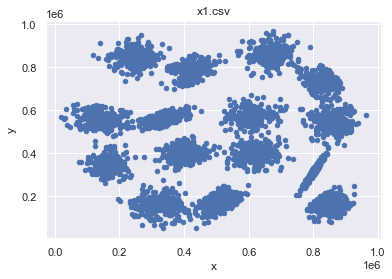

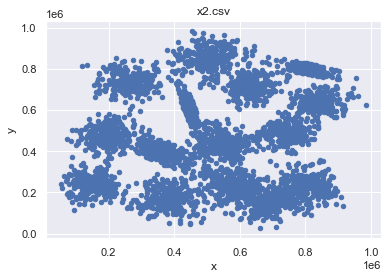

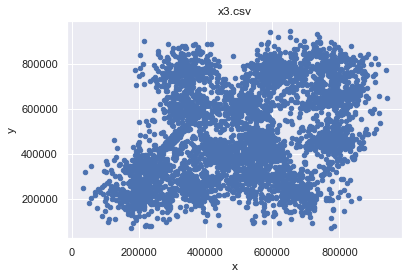

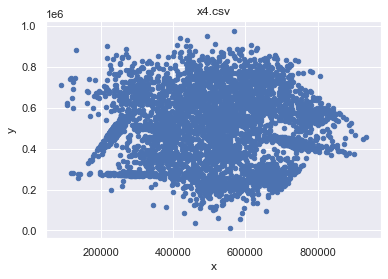

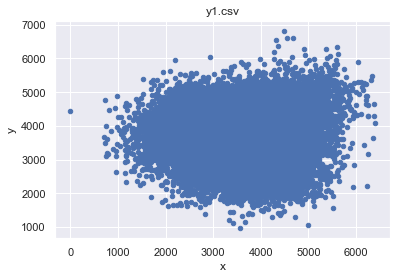

In [33]:
path = 'clustering-iris-dataset/'
#X1 = np.genfromtxt(path+'x1.csv', delimiter=';') 

import pandas as pd
datasets = []
for filename in ['x1', 'x2', 'x3', 'x4', 'y1'] :
    datasets.append(pd.read_csv(path+filename+'.csv', delimiter=';'))
    datasets[-1].plot(kind='scatter', x='x', y='y', title= filename+'.csv')
# Apply KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN on the data

In [31]:
cmap = plt.cm.get_cmap("hsv", 3)
print(cmap)